In [7]:
import numpy as np
import lmfit
from scipy.signal import find_peaks_cwt
%matplotlib inline
import matplotlib.pyplot as plt
import ambigauss
import corner

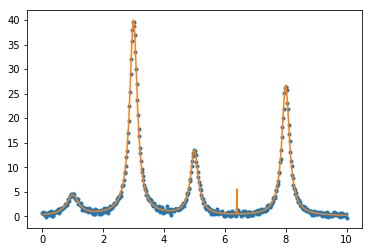

In [10]:
# Simulate noisy 4-peak spectrum
xdata = np.linspace(0, 10, 500)
ydata = ambigauss.lorentzian(xdata, 1, 1, .5) + \
        ambigauss.lorentzian(xdata, 2, 5, .3) + \
        ambigauss.lorentzian(xdata, 6, 3, .3) + \
        ambigauss.lorentzian(xdata, 4, 8, .3) + \
        np.random.randn(len(xdata))*.3 # Add noise


# Call fit function.
r = ambigauss.fit(xdata, ydata, ambigauss.multilorentzian)

# Plot fitter results
xmodel = np.linspace(0,10, 1000)
ymodel = ambigauss.multilorentzian(xmodel, r.params)

plt.plot(xdata, ydata , '.')
plt.plot(xmodel, ymodel, '-')
lmfit.report_fit(r.params)

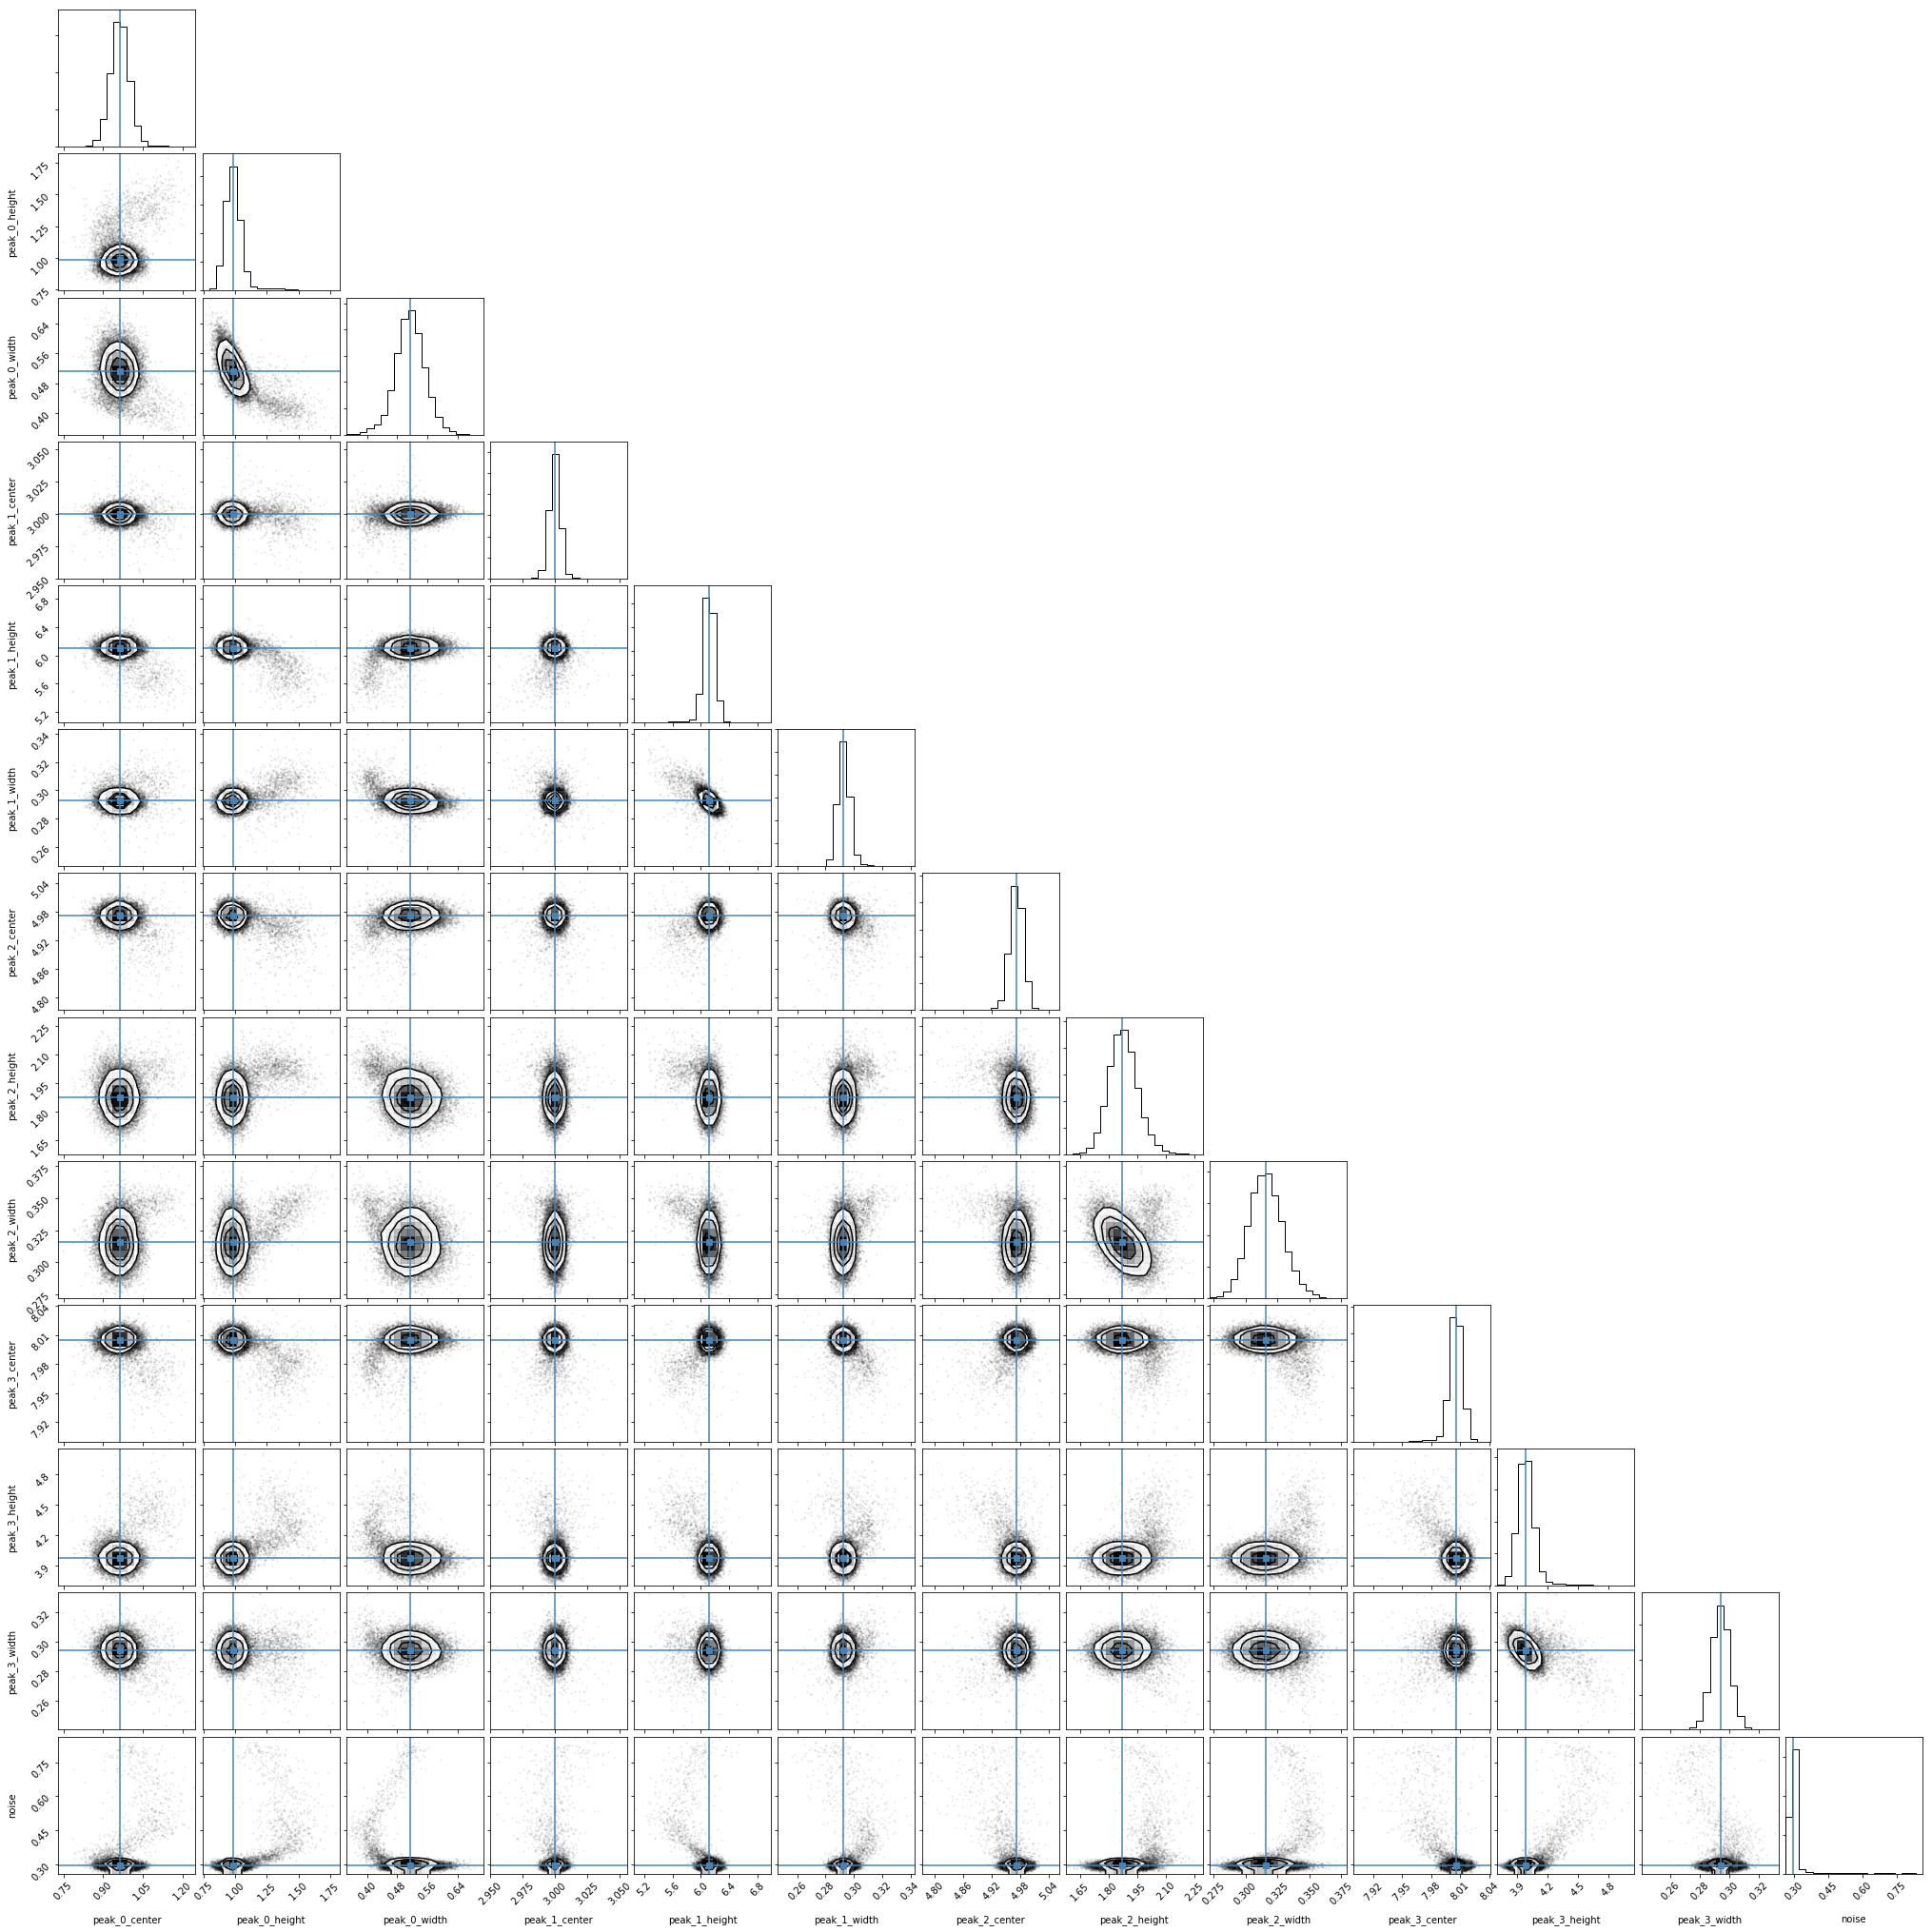

In [3]:
crnr = corner.corner(r.flatchain, labels=r.var_names, truths=list(r.params.valuesdict().values()))